In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from a2c.a2c import A2C
from environments.continuous_teaching import ContinuousTeaching

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback

from environments.continuous_teaching import ContinuousTeaching
from environments.discontinuous_teaching import DiscontinuousTeaching
from human_agents import generate_agents

from baseline_policies.conservative import Conservative 


In [2]:
model=A2C.load('runs/run_1')
model

A2C(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential(
      (0): Linear(in_features=281, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=281, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
    )
  )
  (action_net): Linear(in_features=128, out_features=140, bias=True)
  (value_net): Linear(in_features=128, out_features=1, bias=True)
)

In [3]:
env=model.env
env_t_max=env.n_session*env.n_iter_per_session

In [8]:
def run_one_episode_a2c(model, env, user):
    
    rewards = []
    actions = []
    obs = env.reset_for_new_user(user)
#     env.penalty_coeff=0.0
    while True:
        action = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        actions.append(action)
        if done:
            obs = env.reset_keeping_user()
            break
    return rewards, actions

In [6]:
n_learned = np.array(rewards)*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

NameError: name 'rewards' is not defined

In [7]:
def run_one_episode_conservative(env, user):
    obs = env.reset_for_new_user(user)
#     env.penalty_coeff=0.0
    policy = Conservative(env=env)
    rewards = []
    actions = []
    while True:
        action = policy.act(obs)
        obs, reward, done, _ = env.step(action)
        rewards.append(reward)
        actions.append(action)
        if done:
            obs = env.reset_keeping_user()
            break
    return rewards, actions

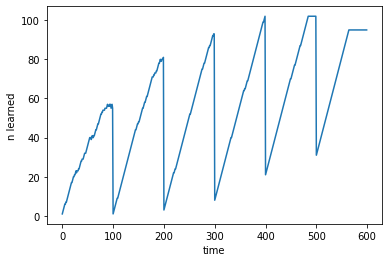

In [21]:
n_learned = np.array(rewards)*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

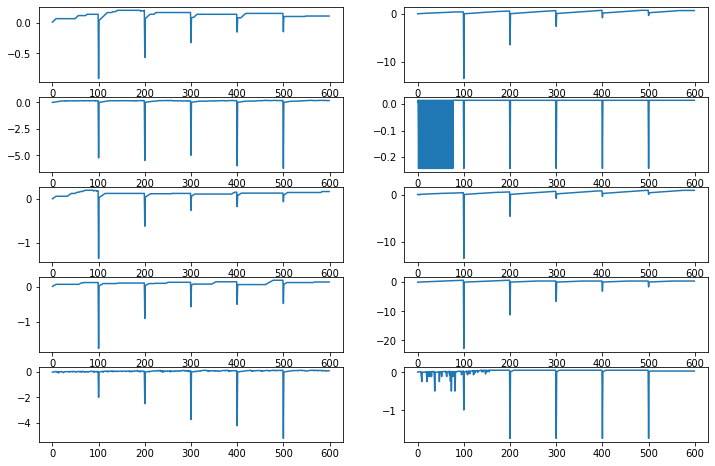

In [16]:
fig, axs = plt.subplots(5, 2, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode_a2c(model, env, i)
    nl1 = np.array(r1)#*env.n_item
#     nlp1 = nl1[nl1>0]
    axs[i, 0].plot(nl1)
    r2, a2 = run_one_episode_conservative(env, i)
    nl2 = np.array(r2)#*env.n_item
#     nlp2 = nl2[nl2>0]
    axs[i, 1].plot(nl2)

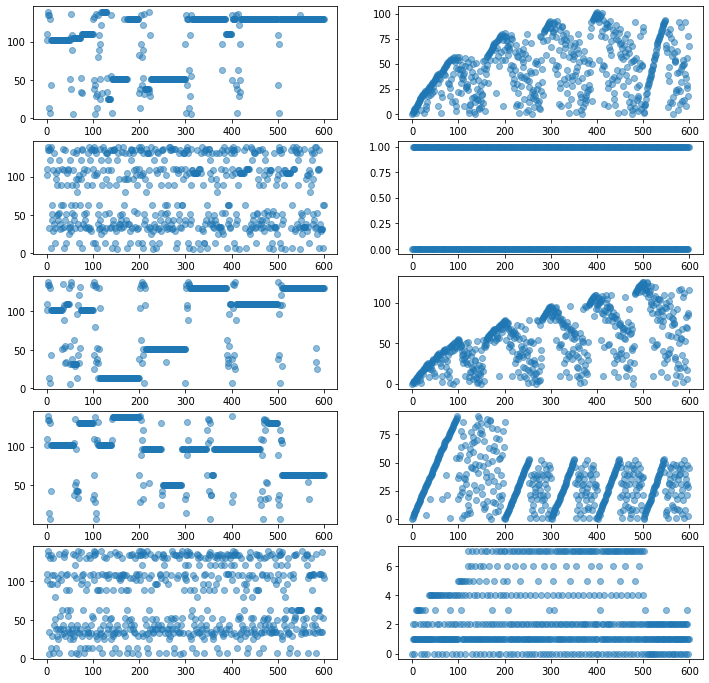

In [15]:
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
for i in range(5):
    r1, a1 = run_one_episode_a2c(model, env, i)
    axs[i, 0].scatter(np.arange(env_t_max), a1, alpha=0.5)
    r2, a2 = run_one_episode_conservative(env, i)
    axs[i, 1].scatter(np.arange(env_t_max), a2, alpha=0.5)